<a href="https://colab.research.google.com/github/MoMahmoud8/Customer-Segmentation-based-on-credit-card/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets
import opendatasets as od
od.download('https://www.kaggle.com/datasets/arjunbhasin2013/ccdata')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mostafamahmoudhassan
Your Kaggle Key: ··········


100%|██████████| 340k/340k [00:00<00:00, 507kB/s]

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
plt.style.use('ggplot')


In [ ]:
df=pd.read_csv('/content/ccdata/CC GENERAL.csv')
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


CUST_ID : Identification of Credit Card holder (Categorical)..
BALANCE : Balance amount left in their account to make purchases.. 
BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)..
PURCHASES : Amount of purchases made from account..
ONEOFF_PURCHASES : Maximum purchase amount done in one-go..
INSTALLMENTS_PURCHASES : Amount of purchase done in installment..
CASH_ADVANCE : Cash in advance given by the user..
PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)..
ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)..
PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)..
CASHADVANCEFREQUENCY : How frequently the cash in advance being paid..
CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"..
PURCHASES_TRX : Numbe of purchase transactions made..
CREDIT_LIMIT : Limit of Credit Card for user..
PAYMENTS : Amount of Payment done by user..
MINIMUM_PAYMENTS : Minimum amount of payments made by user..
PRCFULLPAYMENT : Percent of full payment paid by user..
TENURE : Tenure of credit card service for user..

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [ ]:
dtypes = pd.DataFrame(df.dtypes,columns=["Data Type"])

dtypes["Unique Values"]=df.nunique()

dtypes["Null Values"]=df.isnull().sum()

dtypes["% null Values"]=df.isnull().sum()/len(df)

dtypes.sort_values(by="Null Values" , ascending=False).style.background_gradient(cmap='YlOrRd',axis=0)

,Data Type,Unique Values,Null Values,% null Values
MINIMUM_PAYMENTS,float64,8636,313,0.034972
CREDIT_LIMIT,float64,205,1,0.000112
CUST_ID,object,8950,0,0.000000
BALANCE,float64,8871,0,0.000000
PRC_FULL_PAYMENT,float64,47,0,0.000000
PAYMENTS,float64,8711,0,0.000000
PURCHASES_TRX,int64,173,0,0.000000
CASH_ADVANCE_TRX,int64,65,0,0.000000
CASH_ADVANCE_FREQUENCY,float64,54,0,0.000000
PURCHASES_INSTALLMENTS_FREQUENCY,float64,47,0,0.000000


<Axes: >

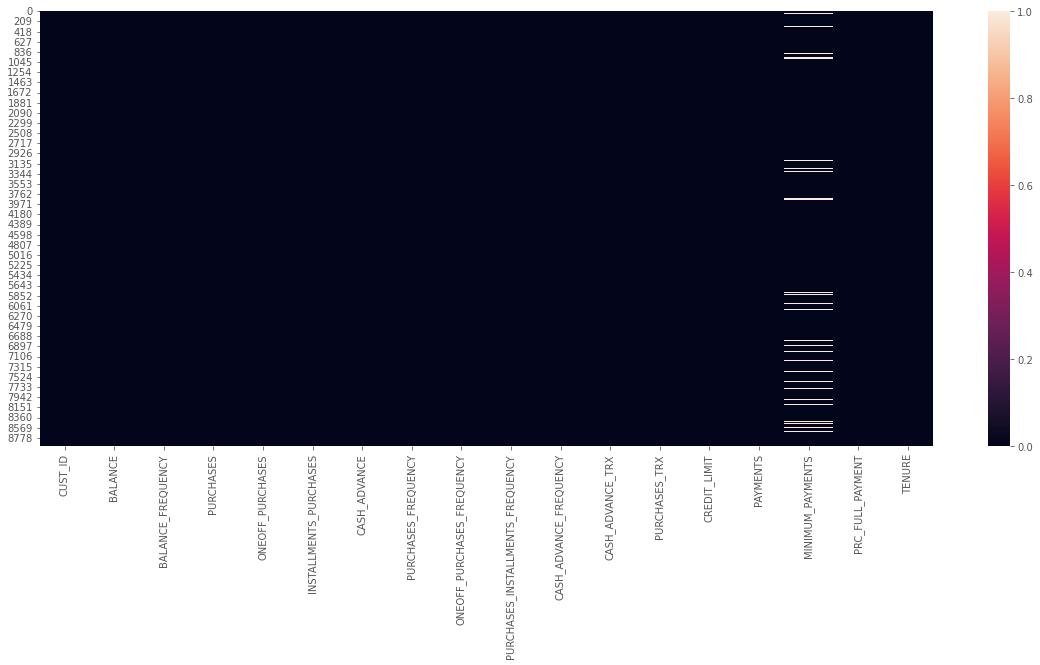

In [ ]:
plt.figure(figsize=(20,8))
sns.heatmap(df.isnull())

In [ ]:
#drop unnecessary column
df.drop(columns='CUST_ID', inplace=True)



In [ ]:
# CREDIT_LIMIT has just 1 value null
df.dropna(subset=['CREDIT_LIMIT'],inplace=True)

In [ ]:
# MINIMUM_PAYMENTS has 313 null values
df['MINIMUM_PAYMENTS'].describe()

count     8636.000000
mean       864.304943
std       2372.566350
min          0.019163
25%        169.163545
50%        312.452292
75%        825.496463
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64

In [ ]:
#we can fill nulls with the mean of the column
df['MINIMUM_PAYMENTS'].fillna( df['MINIMUM_PAYMENTS'].mean(), inplace = True )


In [ ]:
df.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

### EDA

to sea the distribution of the features

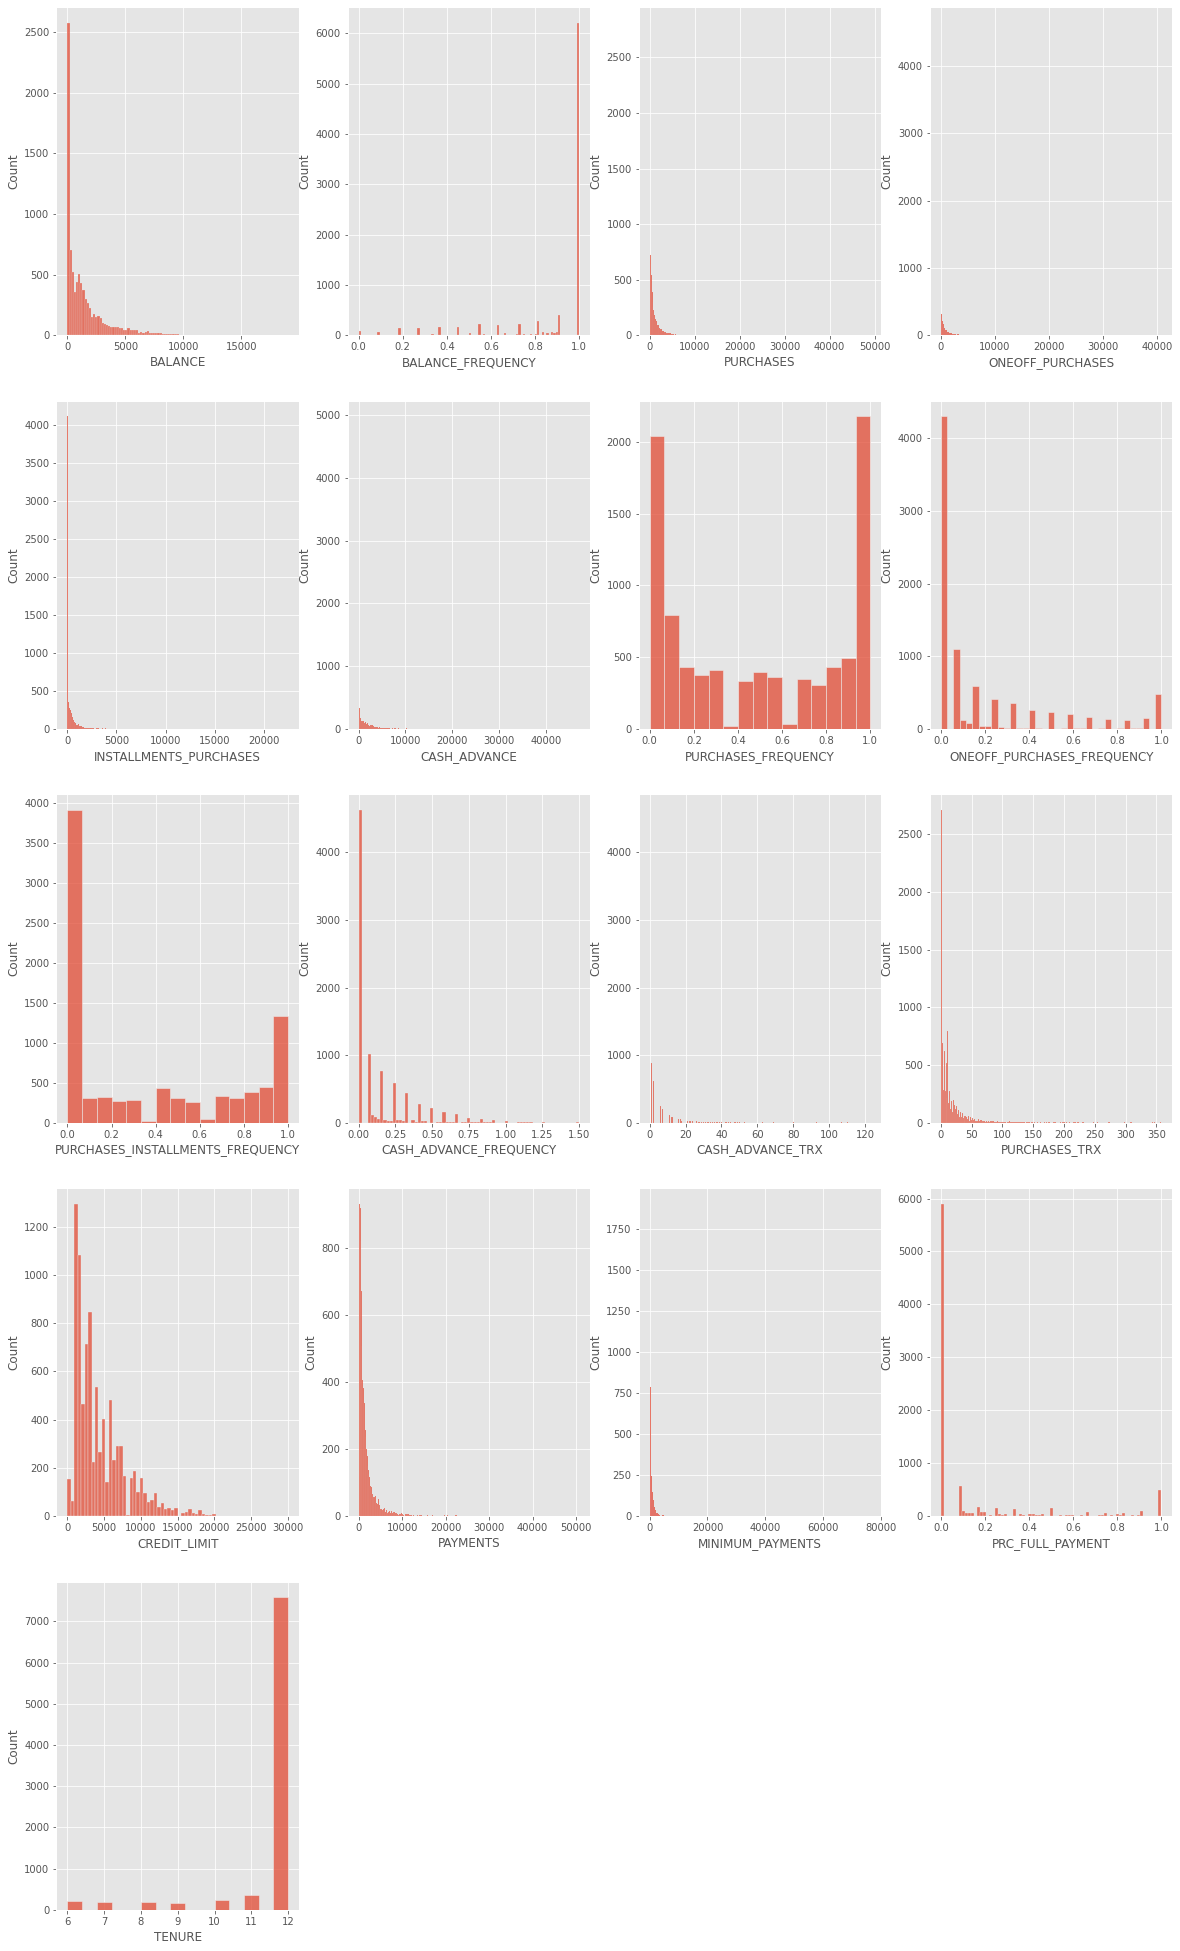

In [ ]:
plt.figure(figsize=(20,35))
for i,col in enumerate(df.columns):
  ax=plt.subplot(5,4,i+1)
  sns.histplot(df[col],ax=ax)
  plt.xlabel(col)
plt.show()

Most of the Features are Right Skewed with Most of the values being (or close to) zero.


<Axes: >

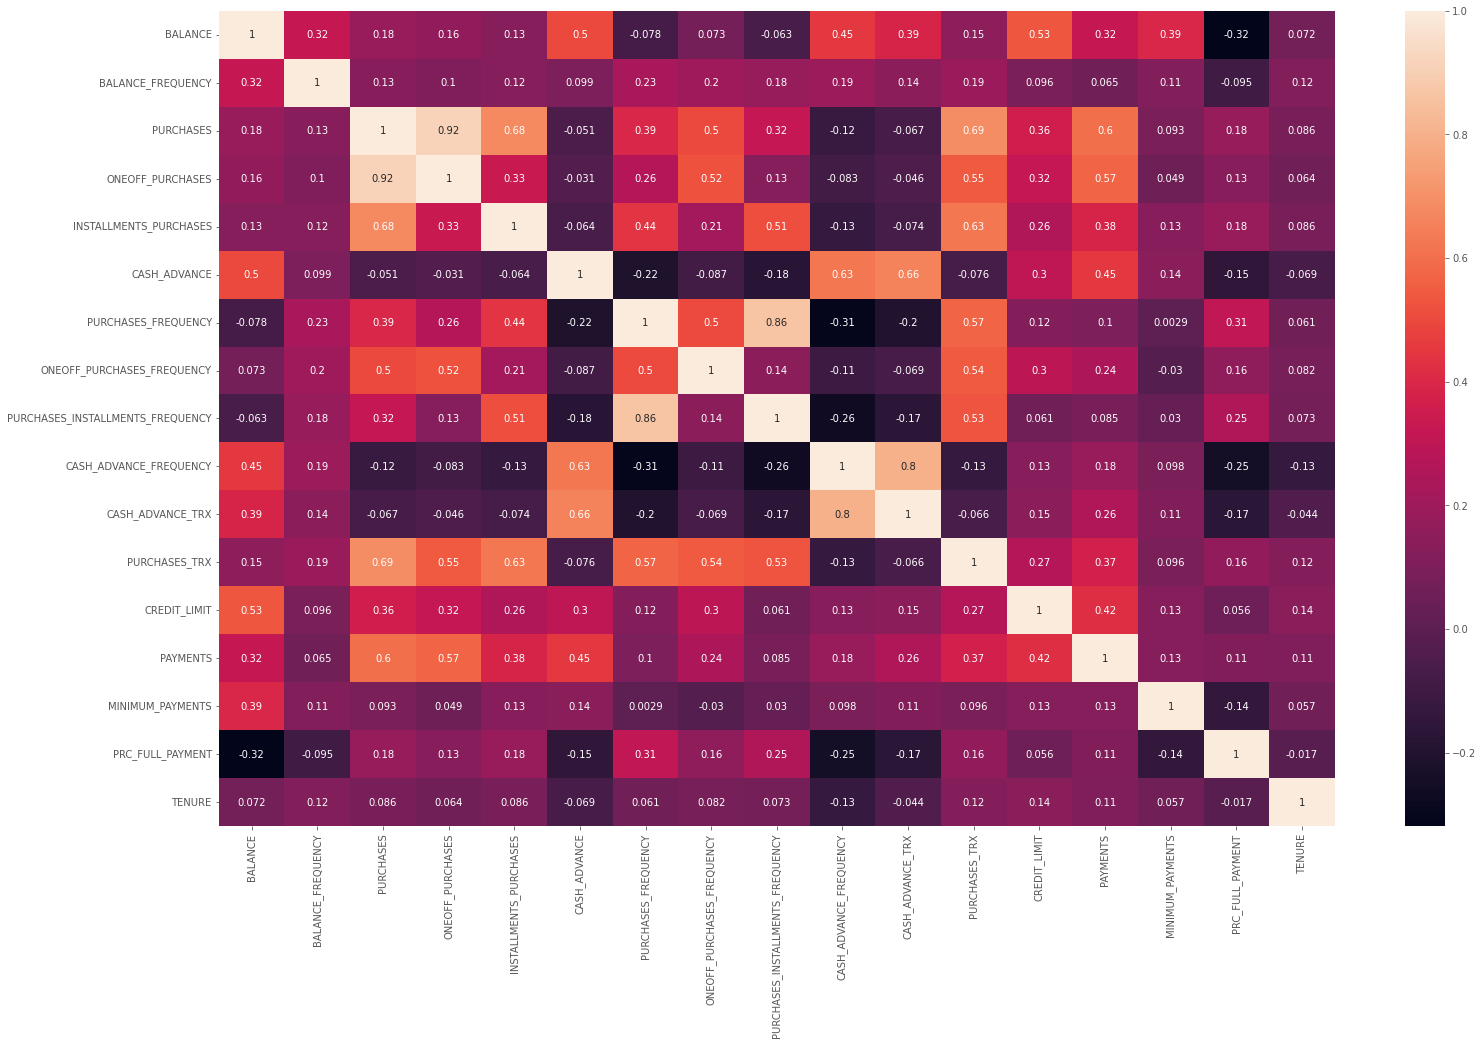

In [ ]:
#Correlation of the Features
plt.figure(figsize=(25,15))
sns.heatmap( df.corr(), annot=True)

We have many Corralated Features as Most of them are just another way to represent existing ones like the frequency features

In [ ]:
#Dealing with outliers

for col in df.columns:

    data = df[col]
    
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)

    IQR = Q3 - Q1

    min = Q1 - (1.5 * IQR)
    max = Q3 + (1.5 * IQR)
 
    outliers = ( (data < min) | (data > max) )
#replace outliers with nan
    df.loc[outliers, col] = np.nan
    
df.isna().sum()

BALANCE                              695
BALANCE_FREQUENCY                   1492
PURCHASES                            808
ONEOFF_PURCHASES                    1013
INSTALLMENTS_PURCHASES               867
CASH_ADVANCE                        1030
PURCHASES_FREQUENCY                    0
ONEOFF_PURCHASES_FREQUENCY           782
PURCHASES_INSTALLMENTS_FREQUENCY       0
CASH_ADVANCE_FREQUENCY               525
CASH_ADVANCE_TRX                     804
PURCHASES_TRX                        766
CREDIT_LIMIT                         248
PAYMENTS                             808
MINIMUM_PAYMENTS                     774
PRC_FULL_PAYMENT                    1474
TENURE                              1365
dtype: int64

In [ ]:
 #Each nan values are imputed using the mean value from n_neighbors nearest neighbors found in the training set.
from sklearn.impute import KNNImputer

imputer = KNNImputer()

df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

df.isna().sum()



BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8949.0,1245.651636,1286.702575,0.000000,128.365782,868.808006,1967.640068,4940.113918
BALANCE_FREQUENCY,8949.0,0.977883,0.060313,0.727273,1.000000,1.000000,1.000000,1.000000
PURCHASES,8949.0,612.415364,672.563326,0.000000,39.580000,360.000000,1023.760000,2711.900000
ONEOFF_PURCHASES,8949.0,230.216073,344.754506,0.000000,0.000000,27.220000,357.342000,1443.330000
INSTALLMENTS_PURCHASES,8949.0,224.980121,285.604192,0.000000,0.000000,89.000000,376.836000,1170.490000
CASH_ADVANCE,8949.0,452.620387,698.120639,0.000000,0.000000,0.000000,830.670122,2784.294727
PURCHASES_FREQUENCY,8949.0,0.490405,0.401360,0.000000,0.083333,0.500000,0.916667,1.000000
ONEOFF_PURCHASES_FREQUENCY,8949.0,0.169233,0.227374,0.000000,0.000000,0.083333,0.266667,0.750000
PURCHASES_INSTALLMENTS_FREQUENCY,8949.0,0.364478,0.397451,0.000000,0.000000,0.166667,0.750000,1.000000
CASH_ADVANCE_FREQUENCY,8949.0,0.105018,0.140621,0.000000,0.000000,0.000000,0.166667,0.545455


# Applying Log Transformation¶


To handle the Skewness in our Features



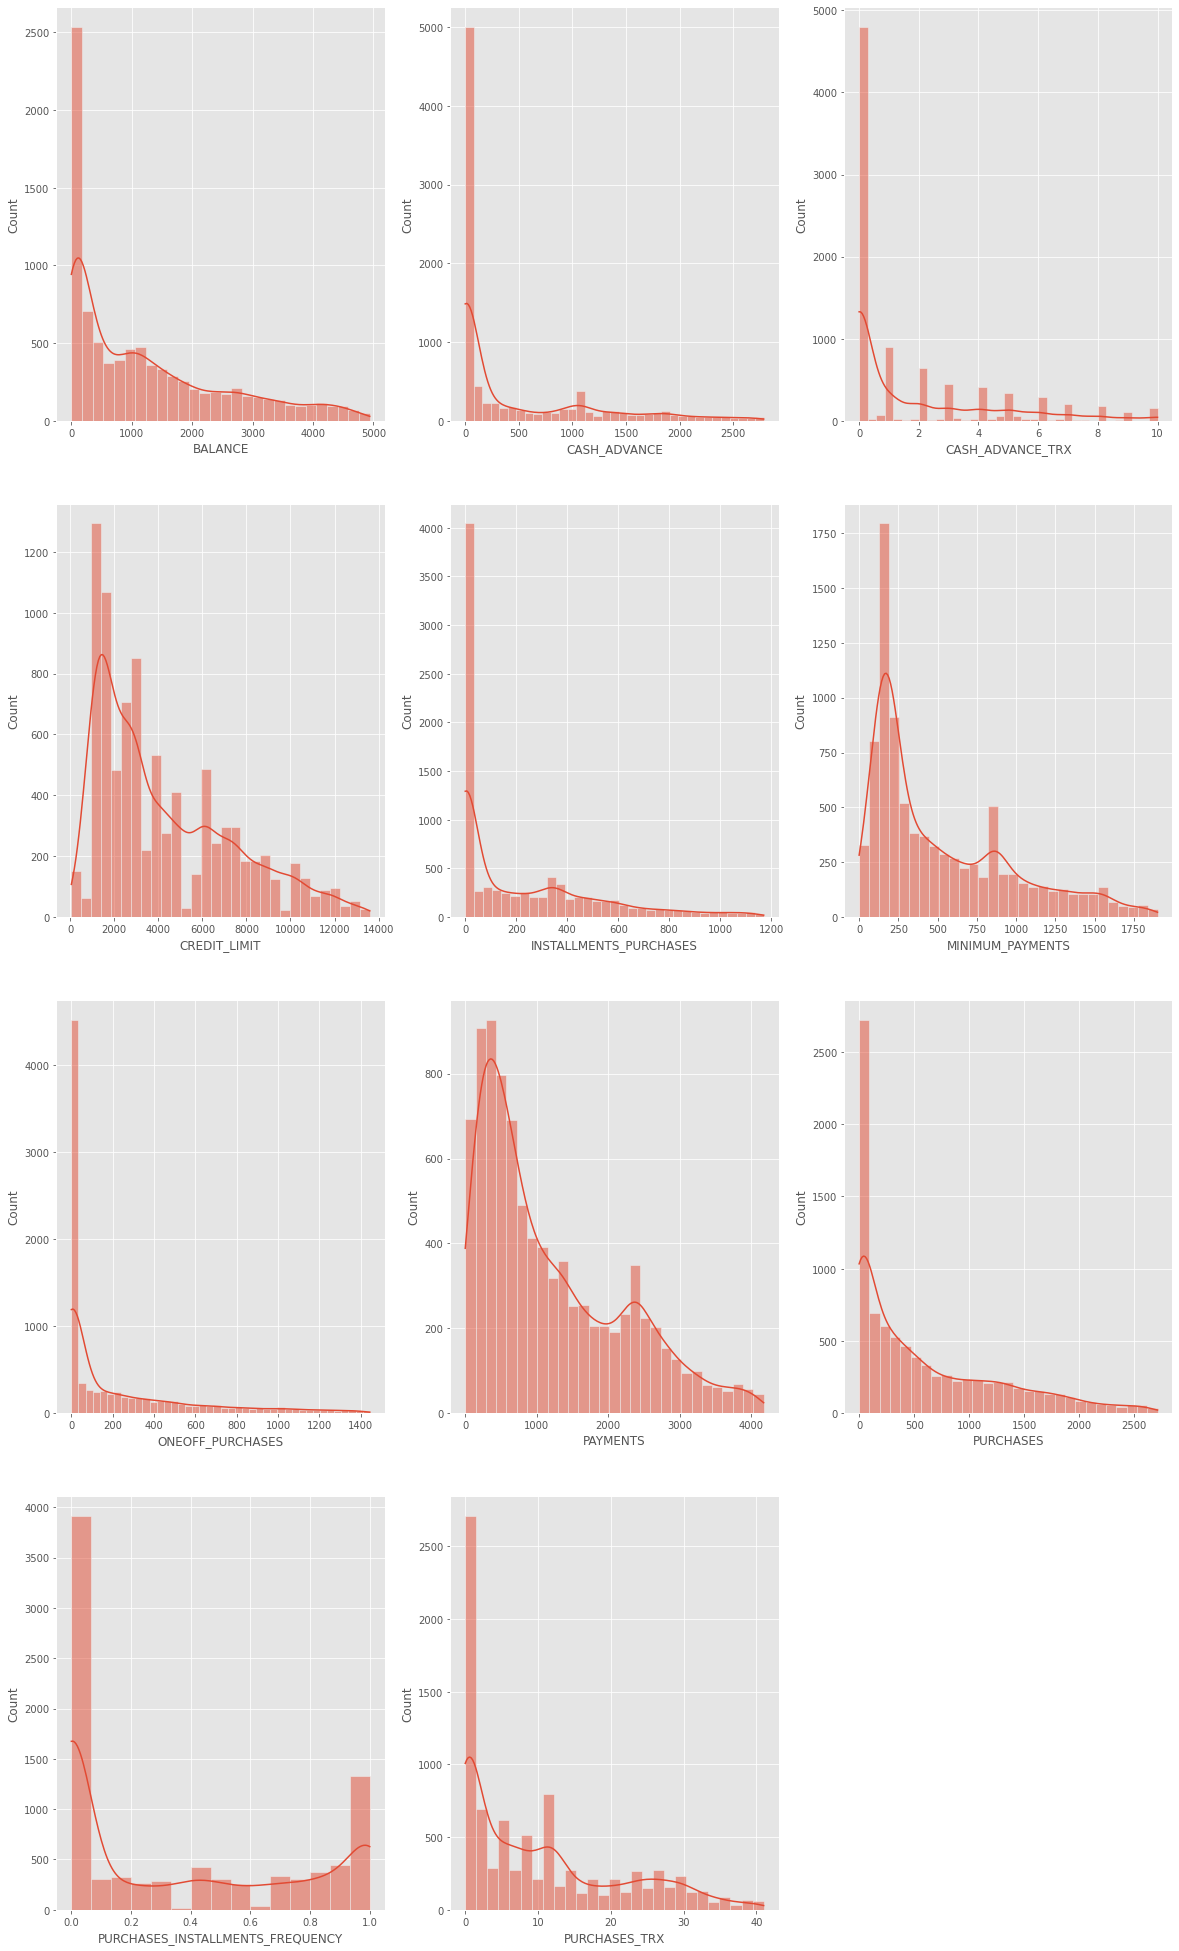

In [ ]:
Skewed_Cols = df.columns.difference(['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
                                    'CASH_ADVANCE_FREQUENCY','PRC_FULL_PAYMENT', 'TENURE'])

plt.figure(figsize=(20,35))

for i, col in enumerate(Skewed_Cols):

        ax = plt.subplot(4, 3, i+1)

        sns.histplot(df[col] , ax=ax , kde=True)

        plt.xlabel(col)
        
plt.show()


In [ ]:
trans_df = df.copy()

for col in Skewed_Cols:
    trans_df[col] = np.log(1 + trans_df[col])

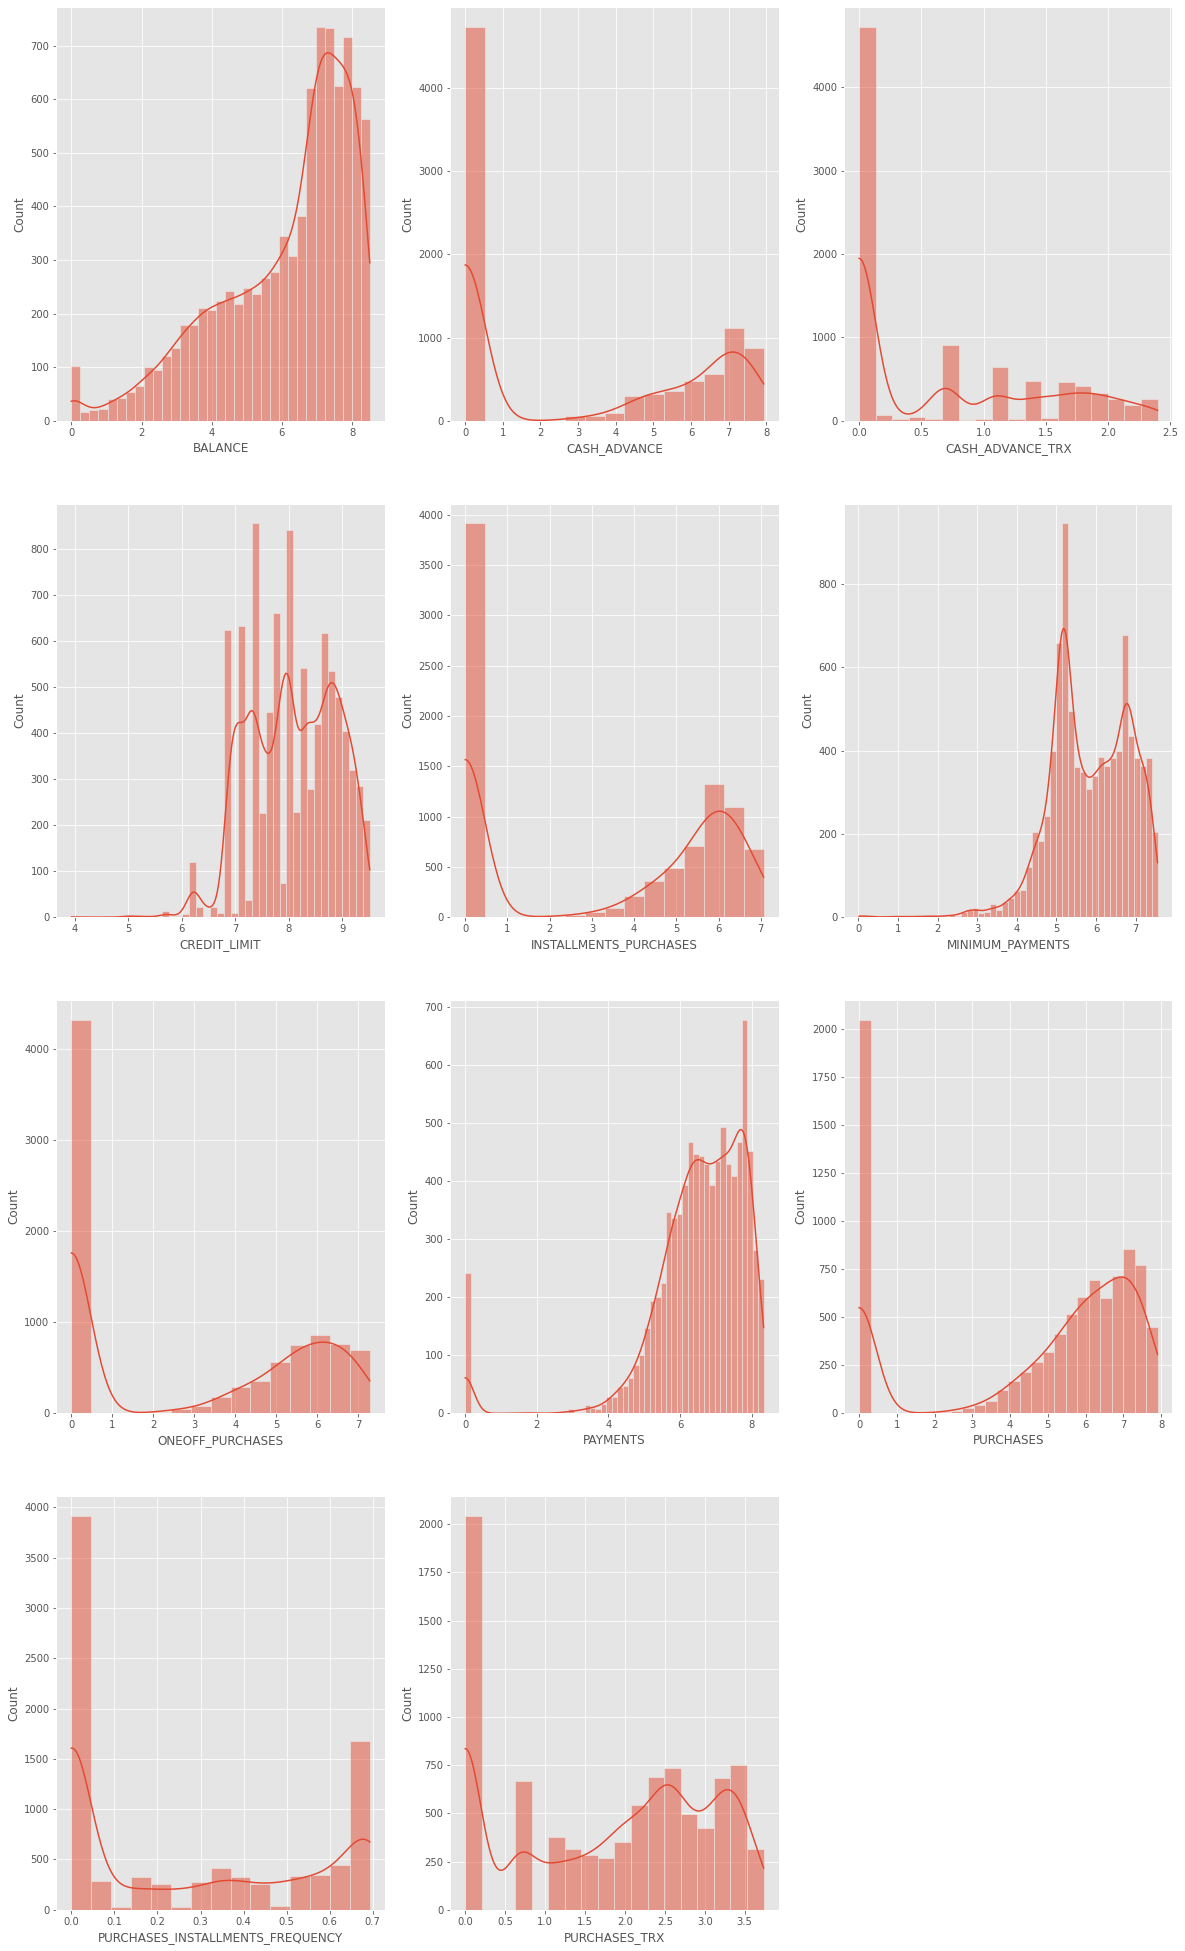

In [ ]:
plt.figure(figsize=(20,35))

for i, col in enumerate(Skewed_Cols):

        ax = plt.subplot(4, 3, i+1)

        sns.histplot(trans_df[col] , ax=ax , kde=True)

        plt.xlabel(col)
        
plt.show()

Not as Symmetric but better than the original Skewness.


In [ ]:
trans_df


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3.735304,0.818182,4.568506,0.000000,4.568506,0.000000,0.166667,0.000000,0.080042,0.000000,0.000000,1.098612,6.908755,5.312231,4.945277,0.000000,12.0
1,8.071989,0.909091,0.000000,0.000000,0.000000,6.974598,0.000000,0.000000,0.000000,0.250000,1.609438,0.000000,8.853808,8.319725,6.978531,0.222222,12.0
2,7.822504,1.000000,6.651791,6.651791,0.000000,0.000000,1.000000,0.650000,0.000000,0.000000,0.000000,2.564949,8.922792,6.434654,6.442994,0.000000,12.0
3,7.419183,0.981818,7.313220,5.123130,0.000000,5.331694,0.083333,0.083333,0.000000,0.083333,0.693147,0.693147,8.922792,0.000000,6.763082,0.000000,12.0
4,6.707735,1.000000,2.833213,2.833213,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0.000000,0.693147,7.090910,6.521114,5.504483,0.000000,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8944,3.384170,1.000000,5.677165,0.000000,5.677165,0.000000,1.000000,0.000000,0.606136,0.000000,0.000000,1.945910,6.908755,5.788719,3.909748,0.016667,12.0
8945,3.004851,1.000000,5.707110,0.000000,5.707110,0.000000,1.000000,0.000000,0.606136,0.000000,0.000000,1.945910,6.908755,5.623517,6.763082,0.000000,12.0
8946,3.194529,0.833333,4.979489,0.000000,4.979489,0.000000,0.833333,0.000000,0.510826,0.000000,0.000000,1.791759,6.908755,4.410016,4.423869,0.250000,12.0
8947,2.671218,0.833333,0.000000,0.000000,0.000000,3.625907,0.000000,0.000000,0.000000,0.166667,1.098612,0.000000,6.216606,3.980615,4.038755,0.250000,12.0


In [ ]:
#Standardize data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_scaled=scaler.fit_transform(trans_df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-1.217776,-2.648009,-0.075249,-0.996572,0.471572,-0.916717,-0.806649,-0.744337,-0.674357,-0.746857,-0.823886,-0.572465,-1.475230,-0.825590,-0.898205,-0.450092,0.0
1,1.021665,-1.140642,-1.713371,-0.996572,-1.103766,1.202477,-1.221928,-0.744337,-0.958359,1.031071,1.186892,-1.450841,0.980495,1.219524,1.142968,2.719790,0.0
2,0.892832,0.366724,0.671751,1.271766,-1.103766,-0.916717,1.269742,2.114548,-0.958359,-0.746857,-0.823886,0.599918,1.067590,-0.062336,0.605345,-0.450092,0.0
3,0.684559,0.065250,0.908919,0.750475,-1.103766,0.703290,-1.014290,-0.377815,-0.958359,-0.154217,0.042109,-0.896648,1.067590,-4.437938,0.926680,-0.450092,0.0
4,0.317172,0.366724,-0.697470,-0.030413,-1.103766,-0.916717,-1.014290,-0.377815,-0.958359,-0.746857,-0.823886,-0.896648,-1.245250,-0.003542,-0.336821,-0.450092,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8944,-1.399099,0.366724,0.322281,-0.996572,0.853865,-0.916717,1.269742,-0.744337,1.192296,-0.746857,-0.823886,0.104977,-1.475230,-0.501575,-1.937767,-0.212351,0.0
8945,-1.594977,0.366724,0.333018,-0.996572,0.864191,-0.916717,1.269742,-0.744337,1.192296,-0.746857,-0.823886,0.104977,-1.475230,-0.613914,0.926680,-0.450092,0.0
8946,-1.497029,-2.396789,0.072116,-0.996572,0.613289,-0.916717,0.854463,-0.744337,0.854123,-0.746857,-0.823886,-0.018272,-1.475230,-1.439102,-1.421644,3.116029,0.0
8947,-1.767264,-2.396789,-1.713371,-0.996572,-1.103766,0.184995,-1.221928,-0.744337,-0.958359,0.438430,0.548684,-1.450841,-2.349101,-1.731097,-1.808257,3.116029,0.0


In [ ]:
#Dimensionality Reduction with PCA¶
from sklearn.decomposition import PCA
pca=PCA()

df_pca=pca.fit_transform(df_scaled)

First, We will Make Componentes to all features in the data.

Then decide how many components are needed based on the cumulative explained variance by the components.

In [ ]:
# Convert to dataframe

component_names = [f"PC{i+1}" for i in range(df_pca.shape[1])]

df_pca = pd.DataFrame(df_pca, columns=component_names)

df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
0,0.076176,3.158124,-0.025302,0.638721,0.279664,2.430998,-0.597492,0.170546,-0.188936,0.266597,0.076725,-0.576883,0.648836,-0.026076,0.062191,0.119748,0.0
1,3.654664,-0.948275,0.487916,2.513284,-1.991290,-0.198644,-0.615791,-1.513992,0.253675,0.160843,-0.079342,-0.033955,-0.185325,-0.115250,-0.009206,0.024554,-0.0
2,-1.533453,-1.463427,-2.742012,-0.788127,-0.161720,-0.077445,-0.015546,-0.497146,1.094841,0.111868,0.255092,0.897815,0.152026,-0.089184,0.117092,0.574949,0.0
3,1.545100,0.475885,-1.562299,-1.924407,1.428422,0.737607,1.878665,-3.087306,-1.023737,-1.273393,0.138358,0.644489,0.508833,0.313338,0.701605,-0.185422,-0.0
4,1.073848,1.599779,-1.339218,-0.815778,-0.276795,-0.188220,-1.424143,0.476513,-0.044604,-0.248761,0.369361,0.036051,-0.155289,-0.093585,-0.045015,-0.056104,0.0


In [ ]:
pca.explained_variance_ratio_


array([0.35719389, 0.18639043, 0.10153428, 0.07994184, 0.06049621,
       0.05668332, 0.04440928, 0.04115424, 0.02041608, 0.0132412 ,
       0.01166371, 0.00953503, 0.0083018 , 0.00448247, 0.00255119,
       0.00200504, 0.        ])

In [ ]:
pca.explained_variance_ratio_.cumsum()


array([0.35719389, 0.54358432, 0.64511859, 0.72506043, 0.78555664,
       0.84223996, 0.88664924, 0.92780348, 0.94821956, 0.96146076,
       0.97312447, 0.9826595 , 0.99096129, 0.99544377, 0.99799496,
       1.        , 1.        ])

array([<Axes: title={'center': '% Explained Variance'}, xlabel='Component'>,
       <Axes: title={'center': '% Cumulative Variance'}, xlabel='Component'>],
      dtype=object)

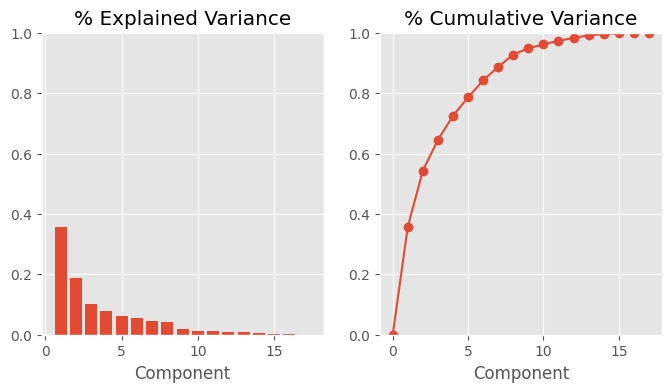

In [ ]:
def plot_variance(pca, width=8, dpi=100):
  
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)

    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )

    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure

    fig.set(figwidth=8, dpi=100)
    return axs


plot_variance(pca)

About 80% of the Variance in the data is explained by only 5 components.
And About 90% of the variance in the data is explained by only 7 components.

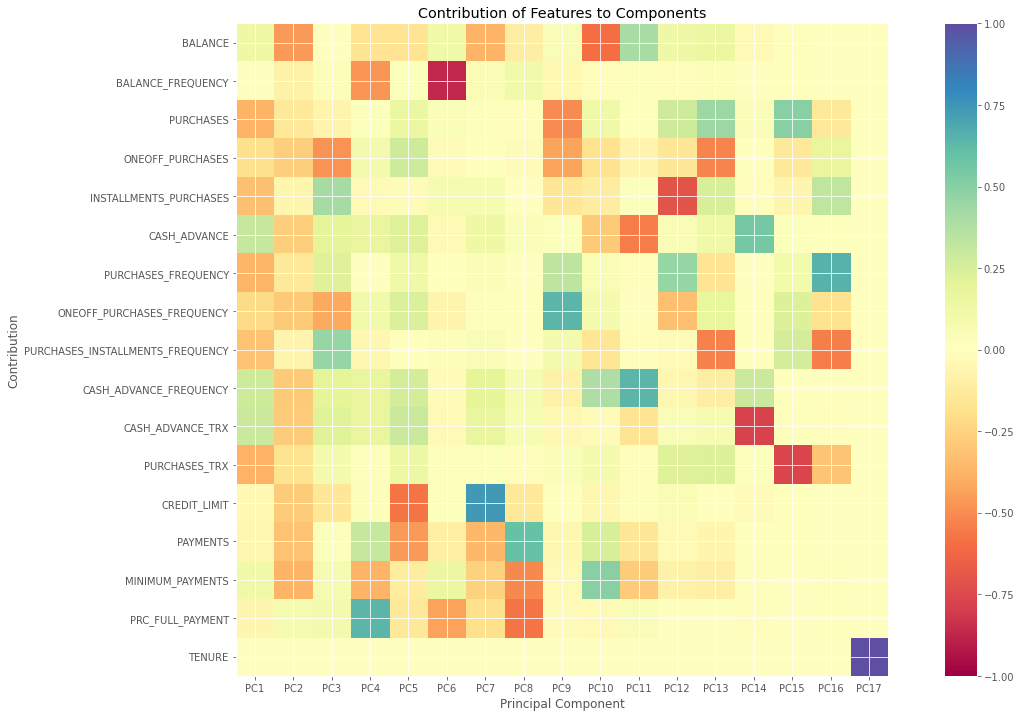

In [ ]:
plt.figure(figsize=(20,12))

plt.imshow(pca.components_.T,
           cmap="Spectral",
           vmin=-1,
           vmax=1,
          )

plt.yticks(range(len(df_scaled.columns)), df_scaled.columns)
plt.xticks(range(len(df_pca.columns)), df_pca.columns)
plt.xlabel("Principal Component")
plt.ylabel("Contribution")
plt.title("Contribution of Features to Components")
plt.colorbar()

Seems Like Purchase Features are not that Important to PCA Components compared to Cash Features.


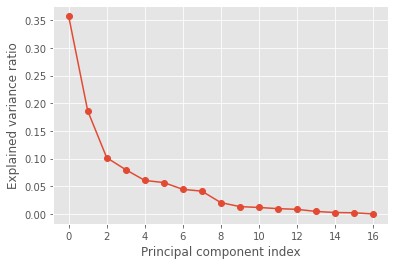

In [ ]:
#Finding Optimum Number of Components¶
plt.plot(pca.explained_variance_ratio_, '-o')

plt.xlabel('Principal component index')
plt.ylabel('Explained variance ratio')
plt.show()

We will go with 5 Components since it gives least amount of dimensions with more explained varaince.


In [ ]:
pca = PCA(n_components = 5 )

df_pca = pca.fit_transform(df_scaled)

In [ ]:
# Convert to dataframe

component_names = [f"PC{i+1}" for i in range(df_pca.shape[1])]

df_pca = pd.DataFrame(df_pca, columns=component_names)

df_pca.head()

,PC1,PC2,PC3,PC4,PC5
0,0.076176,3.158124,-0.025302,0.638721,0.279664
1,3.654664,-0.948275,0.487916,2.513284,-1.991290
2,-1.533453,-1.463427,-2.742012,-0.788127,-0.161721
3,1.545100,0.475885,-1.562299,-1.924407,1.428423
4,1.073848,1.599779,-1.339218,-0.815778,-0.276795


In [ ]:
df_pca.columns

Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], dtype='object')

K-Means Clustering


with scaled_df


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

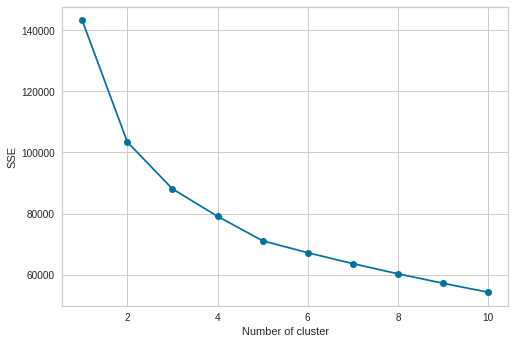

In [ ]:
n_clusters = 10

inertias = []

for n in range(1 , n_clusters+1):

    kmean= KMeans(n, random_state=0)

    kmean.fit(df_scaled)

    inertias.append(kmean.inertia_)

plt.plot(range(1 , n_clusters+1), inertias, '-o')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()    

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

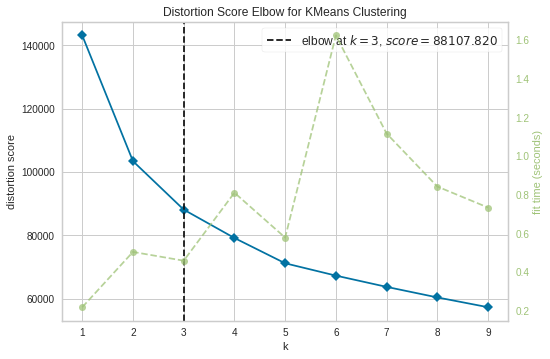

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0)

vis_elbow = KElbowVisualizer(kmeans, k = (1, 10))
vis_elbow.fit(df_scaled)
vis_elbow.poof()

Seems Like Customers can be grouped to 3 or 4 Clusters.


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

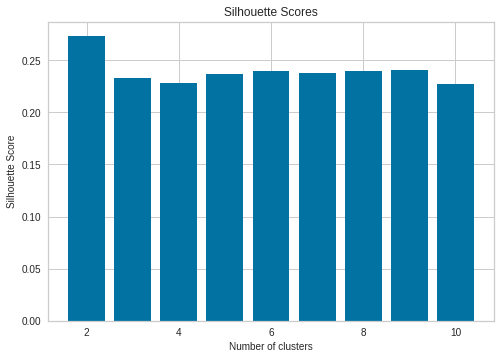

In [ ]:
silhouette_scores = [] 

for n_cluster in range(2 , n_clusters+1):

  kmeans = KMeans(n_cluster, random_state=0)

  labels = kmeans.fit_predict(df_scaled)

  silhouette_scores.append(silhouette_score(df_scaled, labels))
    
plt.bar(range(2 , n_clusters+1), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10)
plt.title('Silhouette Scores')
plt.show()

Silhoutte Score for 2 Clusters are Better ,But we will Check the Clusters Distributions with Silhoutte Diagram.


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


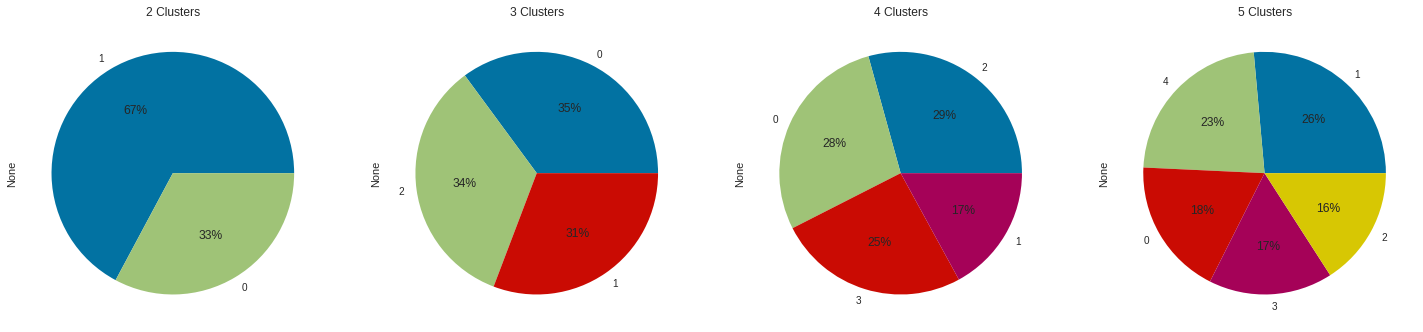

In [ ]:
plt.figure(figsize=(25,25))

for i, n_cluster in enumerate(range(2,6)):

  kmeans = KMeans(n_clusters=n_cluster, random_state=0)

  labels = kmeans.fit_predict(df_scaled)

  labels = pd.Series(labels)

  ax = plt.subplot(1 , 4, i+1)

  ax.set_title(f"{n_cluster} Clusters")

  labels.value_counts().plot.pie(autopct='%1.0f%%', ax = ax)

It Appears that having 3 Clusters will result in more Equally Distributed Clusters.


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


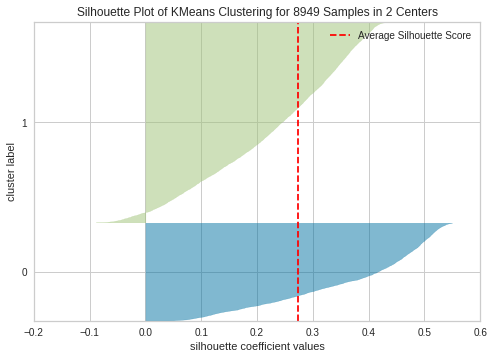

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


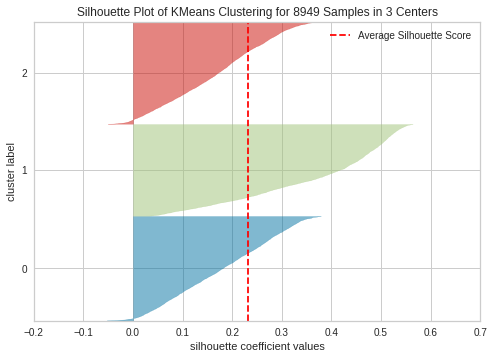

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


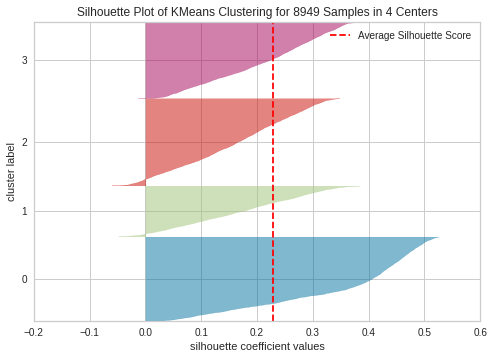

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


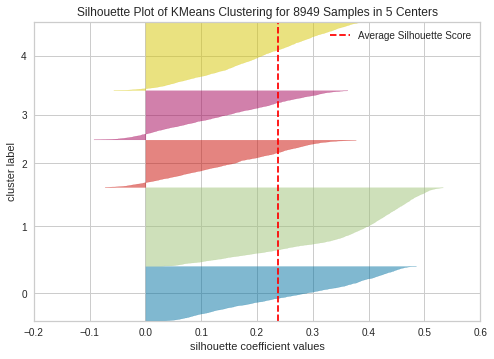

with df_pca

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

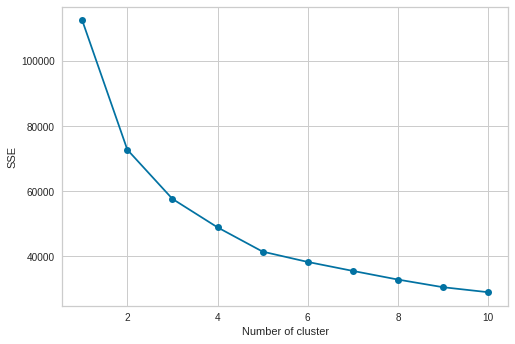

In [ ]:
n_clusters = 10

inertias = []

for n_cluster in range(1 , n_clusters+1):

    kmean= KMeans(n_cluster, random_state=0)

    kmean.fit(df_pca)

    inertias.append(kmean.inertia_)

plt.plot(range(1 , n_clusters+1), inertias, '-o')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show() 

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

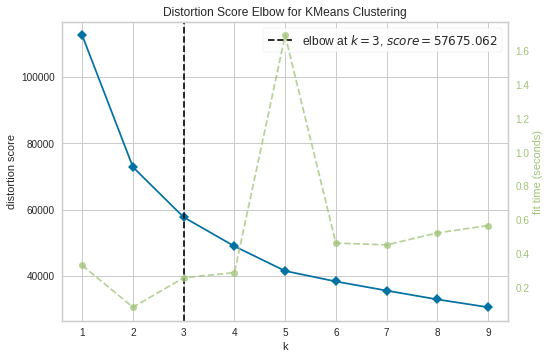

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0)

vis_elbow = KElbowVisualizer(kmeans, k = (1, 10))
vis_elbow.fit(df_pca)
vis_elbow.poof()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

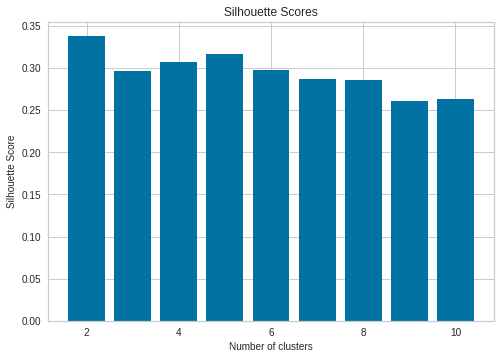

In [ ]:
silhouette_scores = [] 

for n_cluster in range(2 , n_clusters+1):

  kmeans = KMeans(n_cluster, random_state=0)

  labels = kmeans.fit_predict(df_pca)

  silhouette_scores.append(silhouette_score(df_pca, labels))
    
plt.bar(range(2 , n_clusters+1), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10)
plt.title('Silhouette Scores')
plt.show()


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


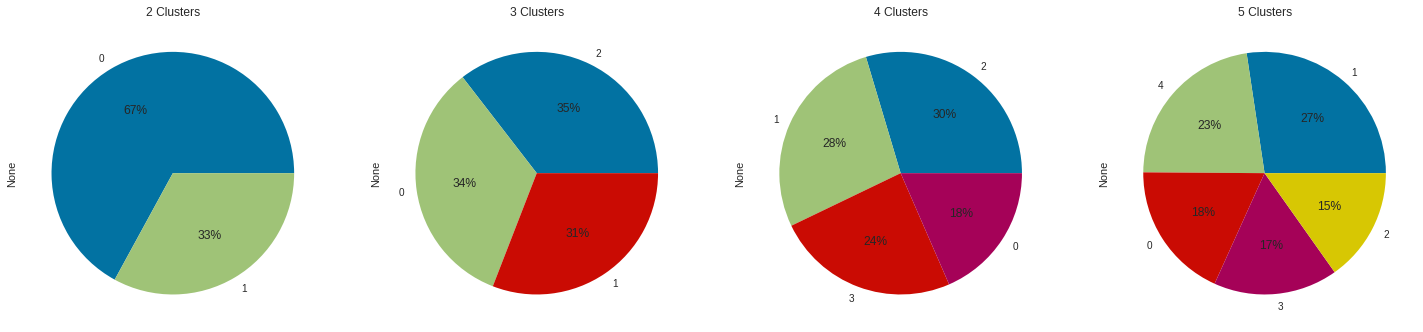

In [ ]:
plt.figure(figsize=(25,25))

for i, n_cluster in enumerate(range(2,6)):

  kmeans = KMeans(n_clusters=n_cluster, random_state=0)

  labels = kmeans.fit_predict(df_pca)

  labels = pd.Series(labels)

  ax = plt.subplot(1 , 4, i+1)

  ax.set_title(f"{n_cluster} Clusters")

  labels.value_counts().plot.pie(autopct='%1.0f%%', ax = ax)

Same Results appear when Using PCA but with Smaller SSE and Increased Silhouette Scores.


## Visualizing Clusters¶


In [ ]:
kmeans = KMeans(n_clusters = 3, random_state=0)

pca_labels = kmeans.fit_predict(df_pca)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


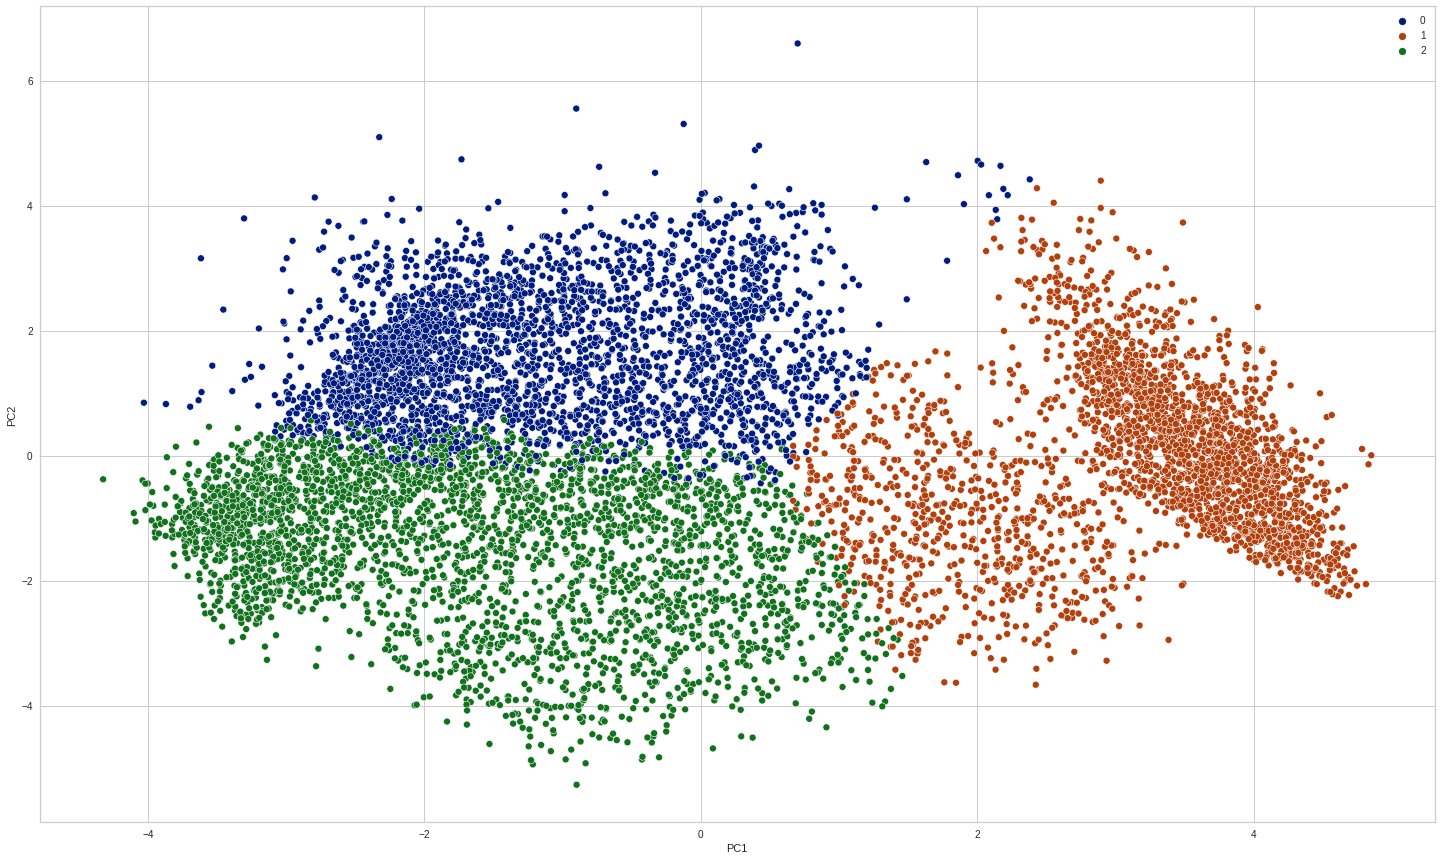

In [ ]:
plt.figure(figsize=(25,15))

ax = sns.scatterplot(x= df_pca["PC1"], y= df_pca["PC2"], hue = pca_labels, data = df_pca, palette='dark')
plt.show()

With 3 Clusters there are some Overlapping in the Clusters. Explaining their smaller silhoutte scores than 2 Clusters.


## Clusters Analysis¶


In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0)

scaled_labesl = kmeans.fit_predict(df_scaled)

In [ ]:
df["Clusters"] = scaled_labesl

df["Clusters"] = df["Clusters"].astype('category')

df

<Figure size 1440x2520 with 0 Axes>

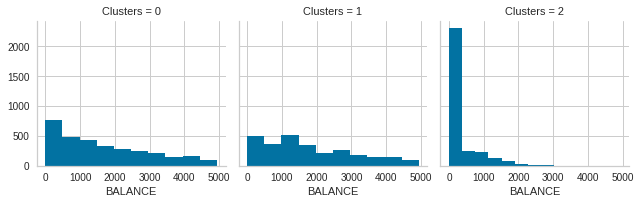

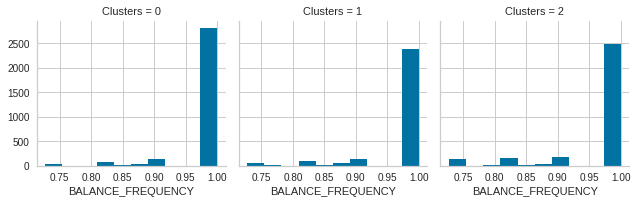

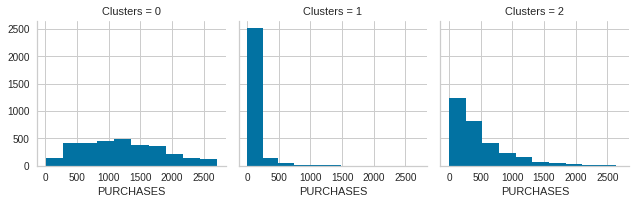

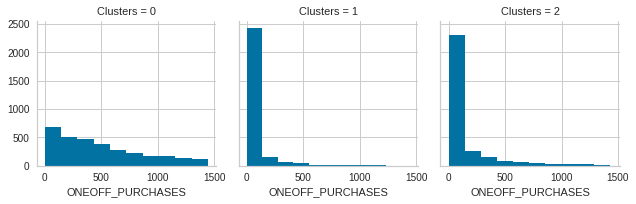

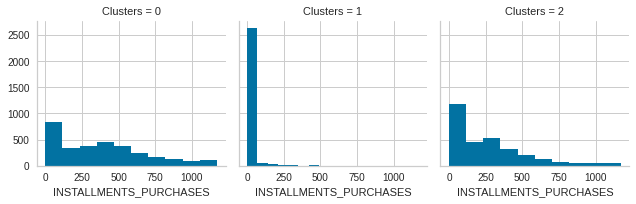

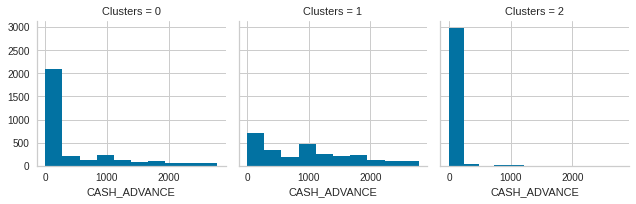

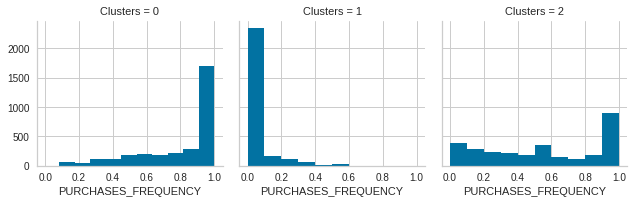

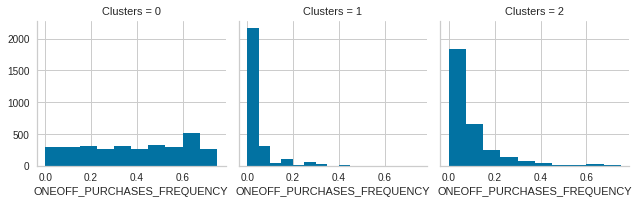

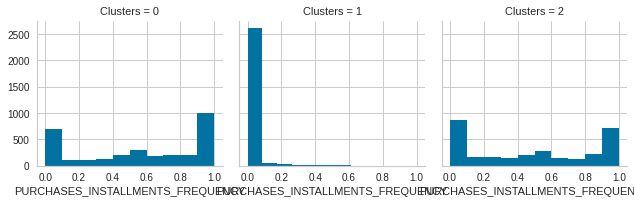

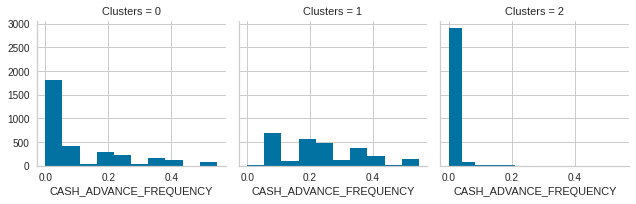

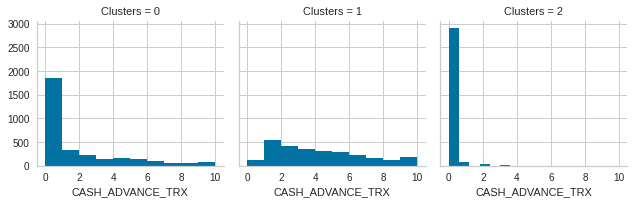

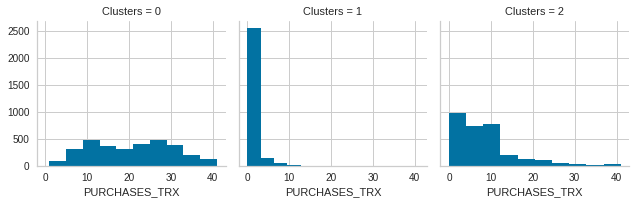

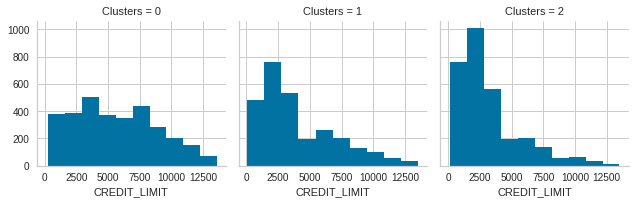

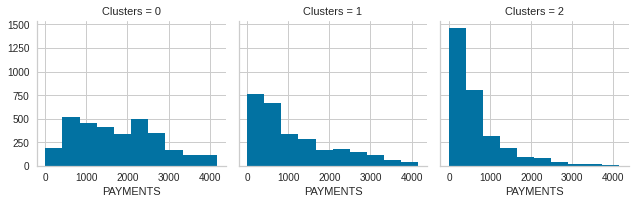

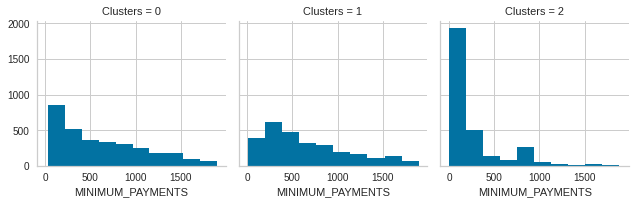

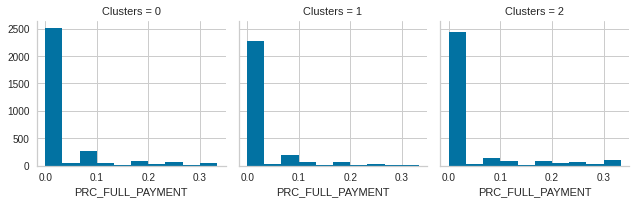

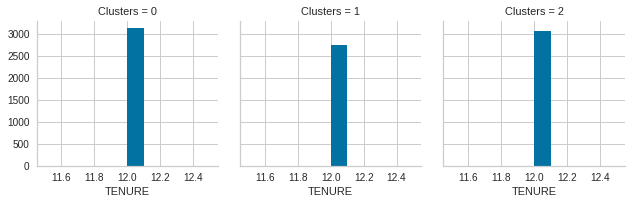

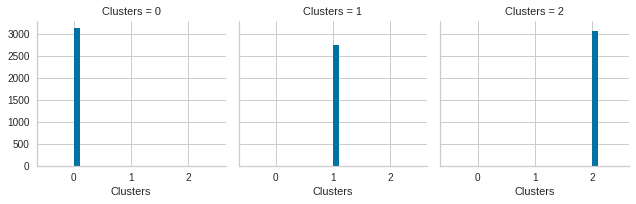

In [64]:
plt.figure(figsize=(20,35))

for col in df.columns:

    grid = sns.FacetGrid(df, col='Clusters')

    grid.map(plt.hist, col)
    
    plt.show()

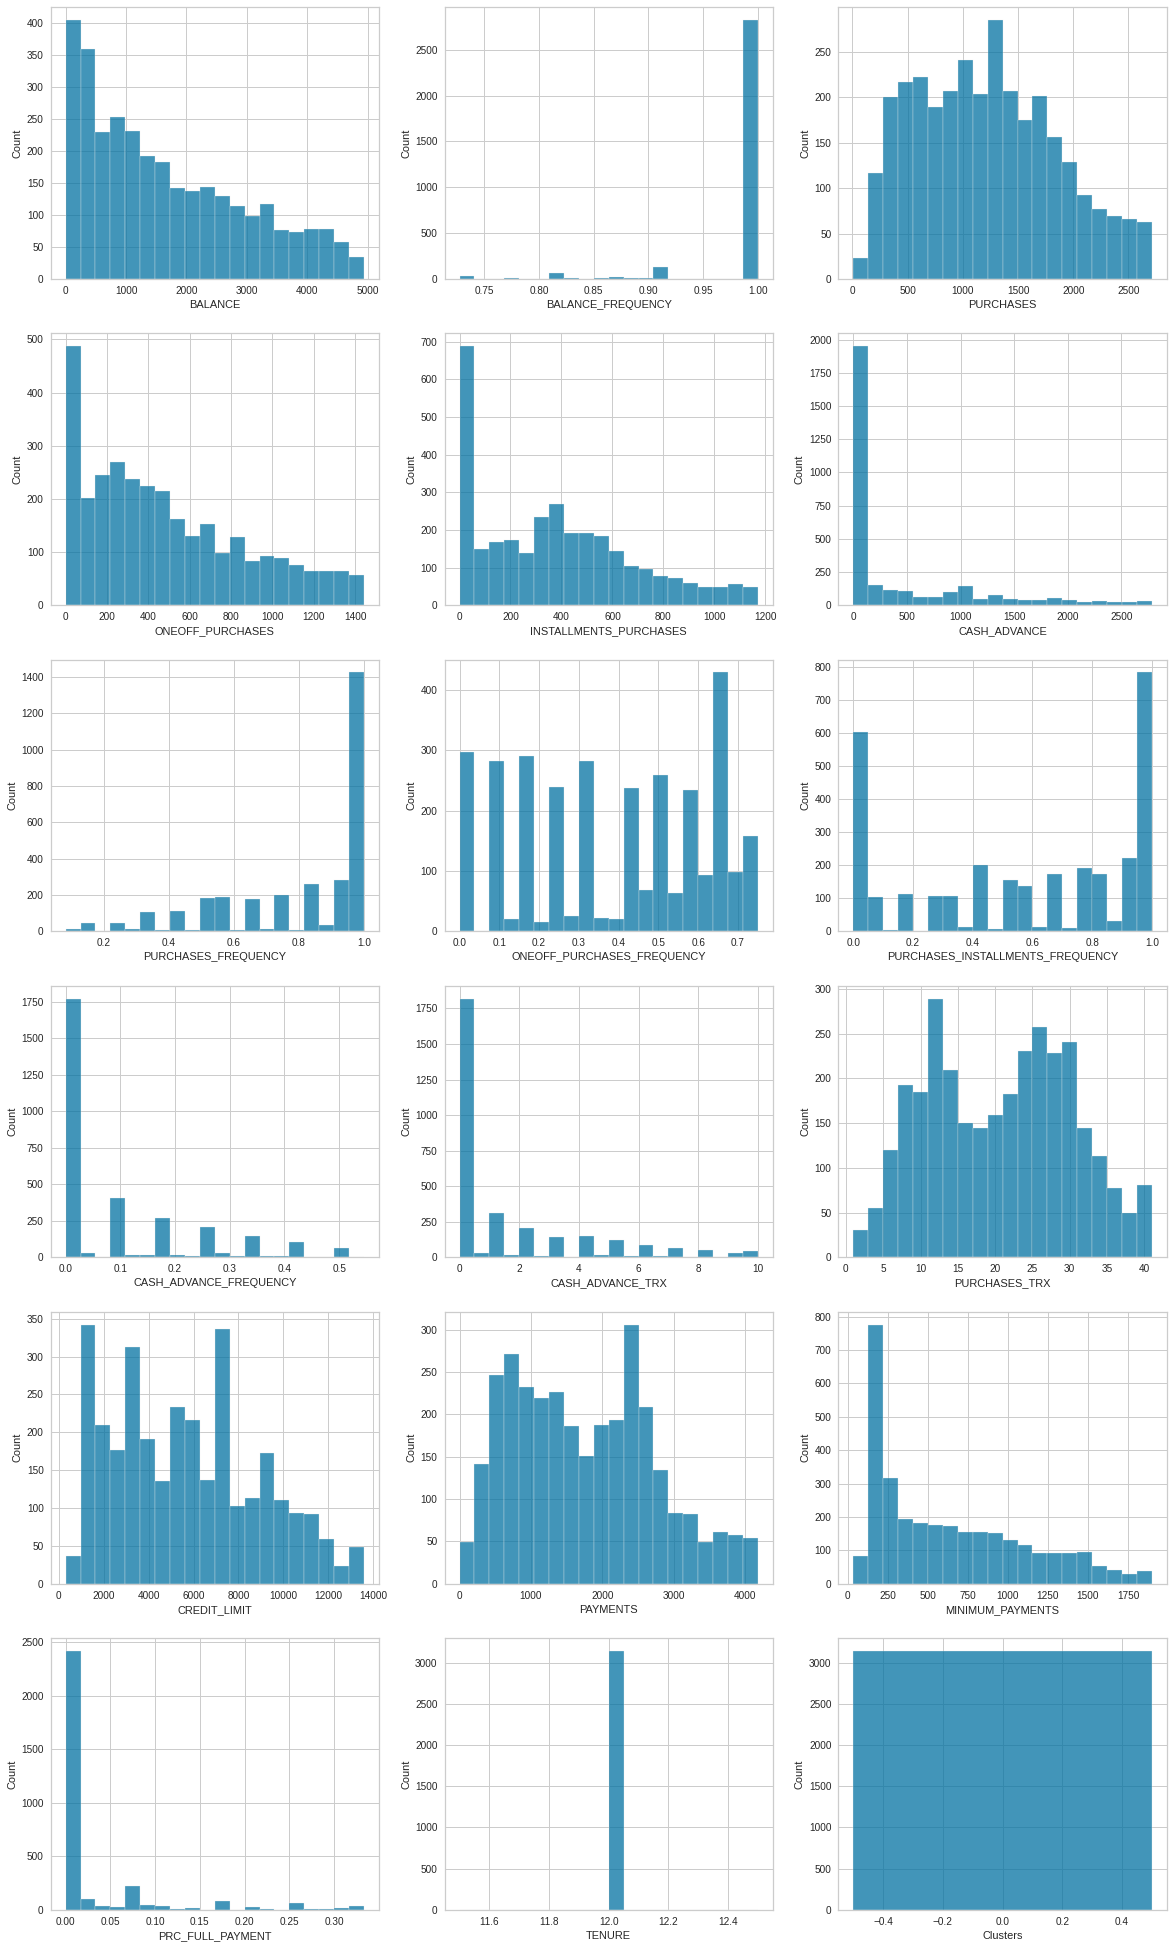

In [65]:
plt.figure(figsize=(20,35))

for i, col in enumerate(df.columns):

        ax = plt.subplot(6, 3, i+1)

        sns.histplot( x = col , ax=ax , bins=20 , data = df[df['Clusters'] == 0])

        plt.xlabel(col)
        
plt.show()


**Cluster 0 :**


Customers with Medium Balance, Update their Balance More Frequently.

With Medium Purchases Amount and pay more in Single Transaction, Prefer more Installment Purchases.

Purchase More Frequently with High Payments and they have a High Credit Limit.




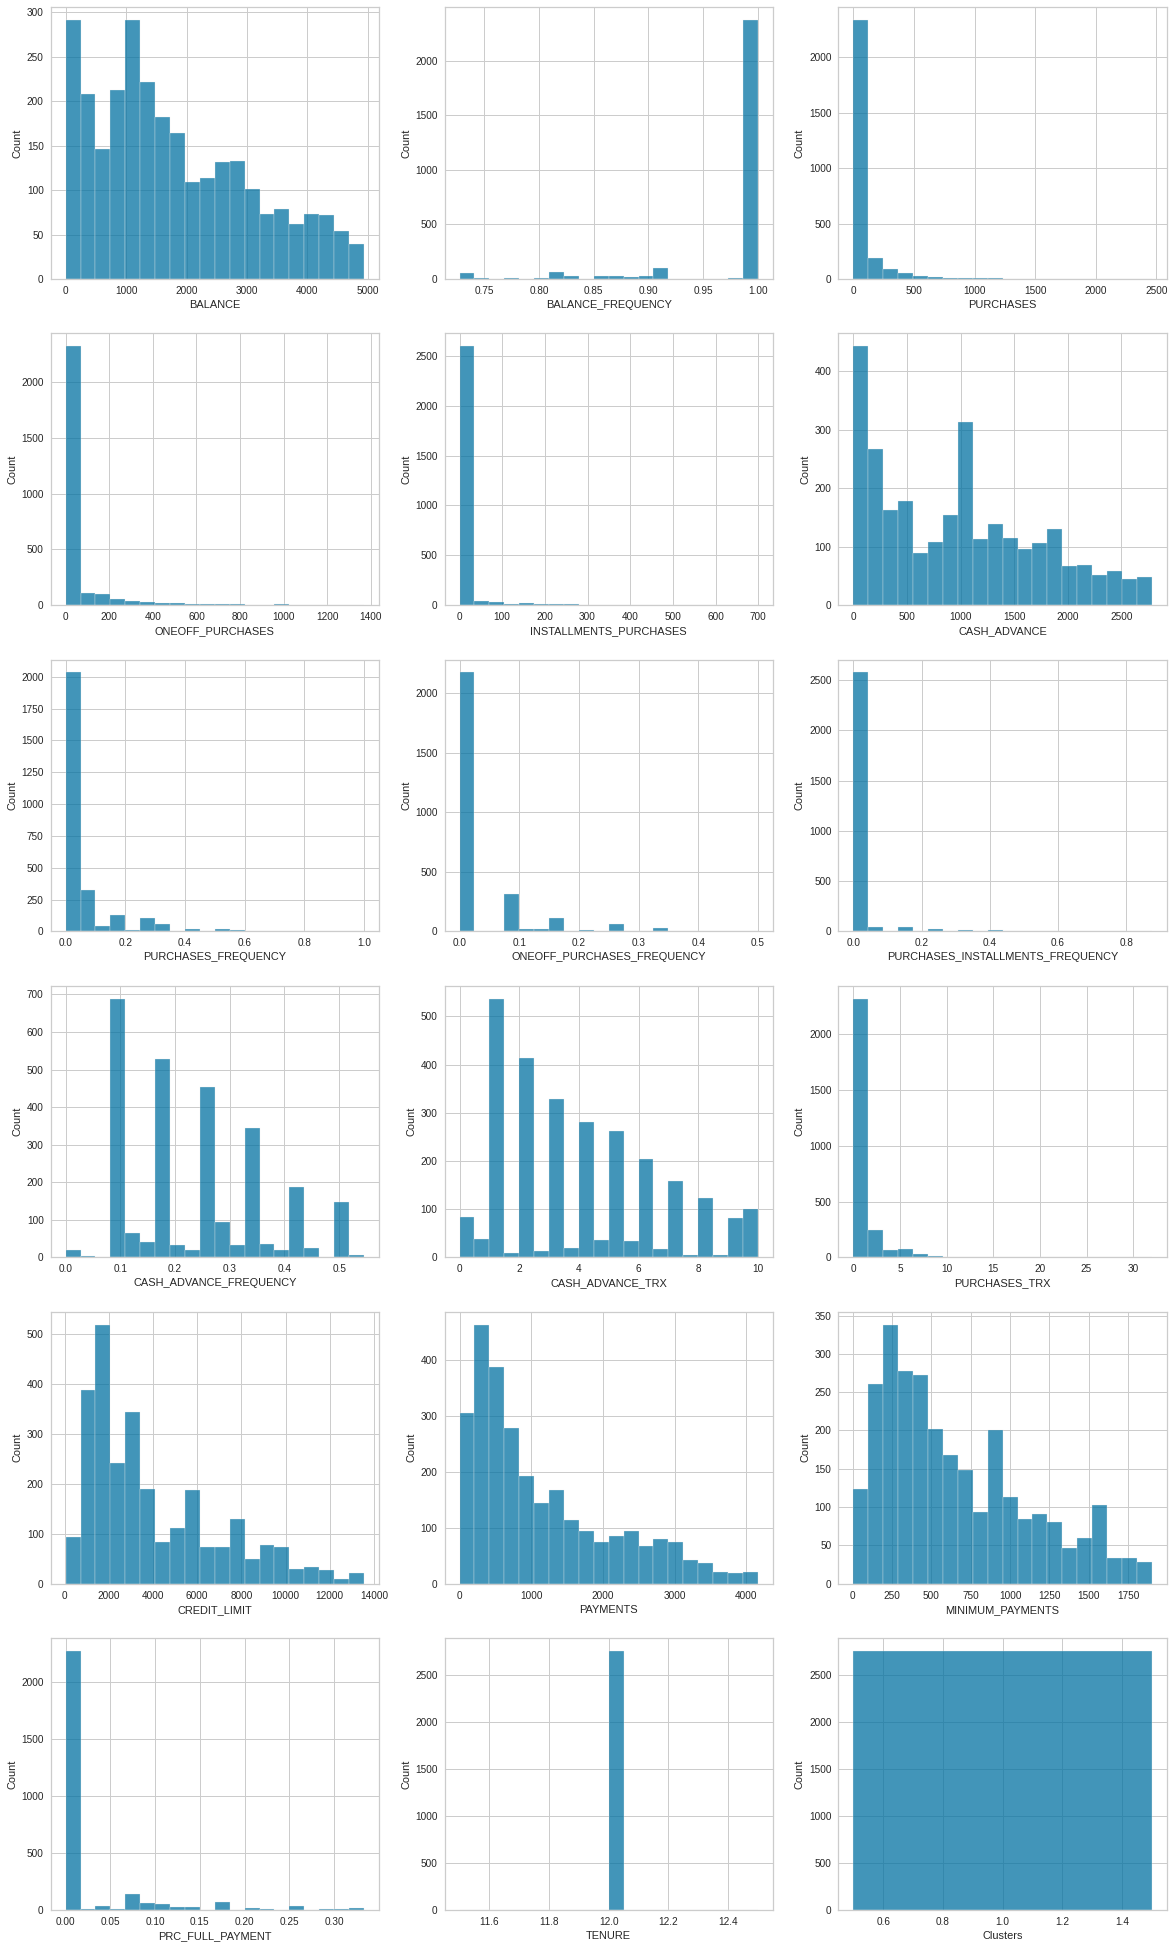

In [66]:
plt.figure(figsize=(20,35))

for i, col in enumerate(df.columns):

        ax = plt.subplot(6, 3, i+1)

        sns.histplot( x = col , ax=ax , bins=20 , data = df[df['Clusters'] == 1])

        plt.xlabel(col)
        
plt.show()

**Cluster 1 :**

Customers with Above Medium Balance.

Doesn't Prefer Installment Purchases , But Prefer to Pay in advance.

Doesn't Purchase Frequently but when they do it's with Medium Payments and they have a Medium Credit Limit.


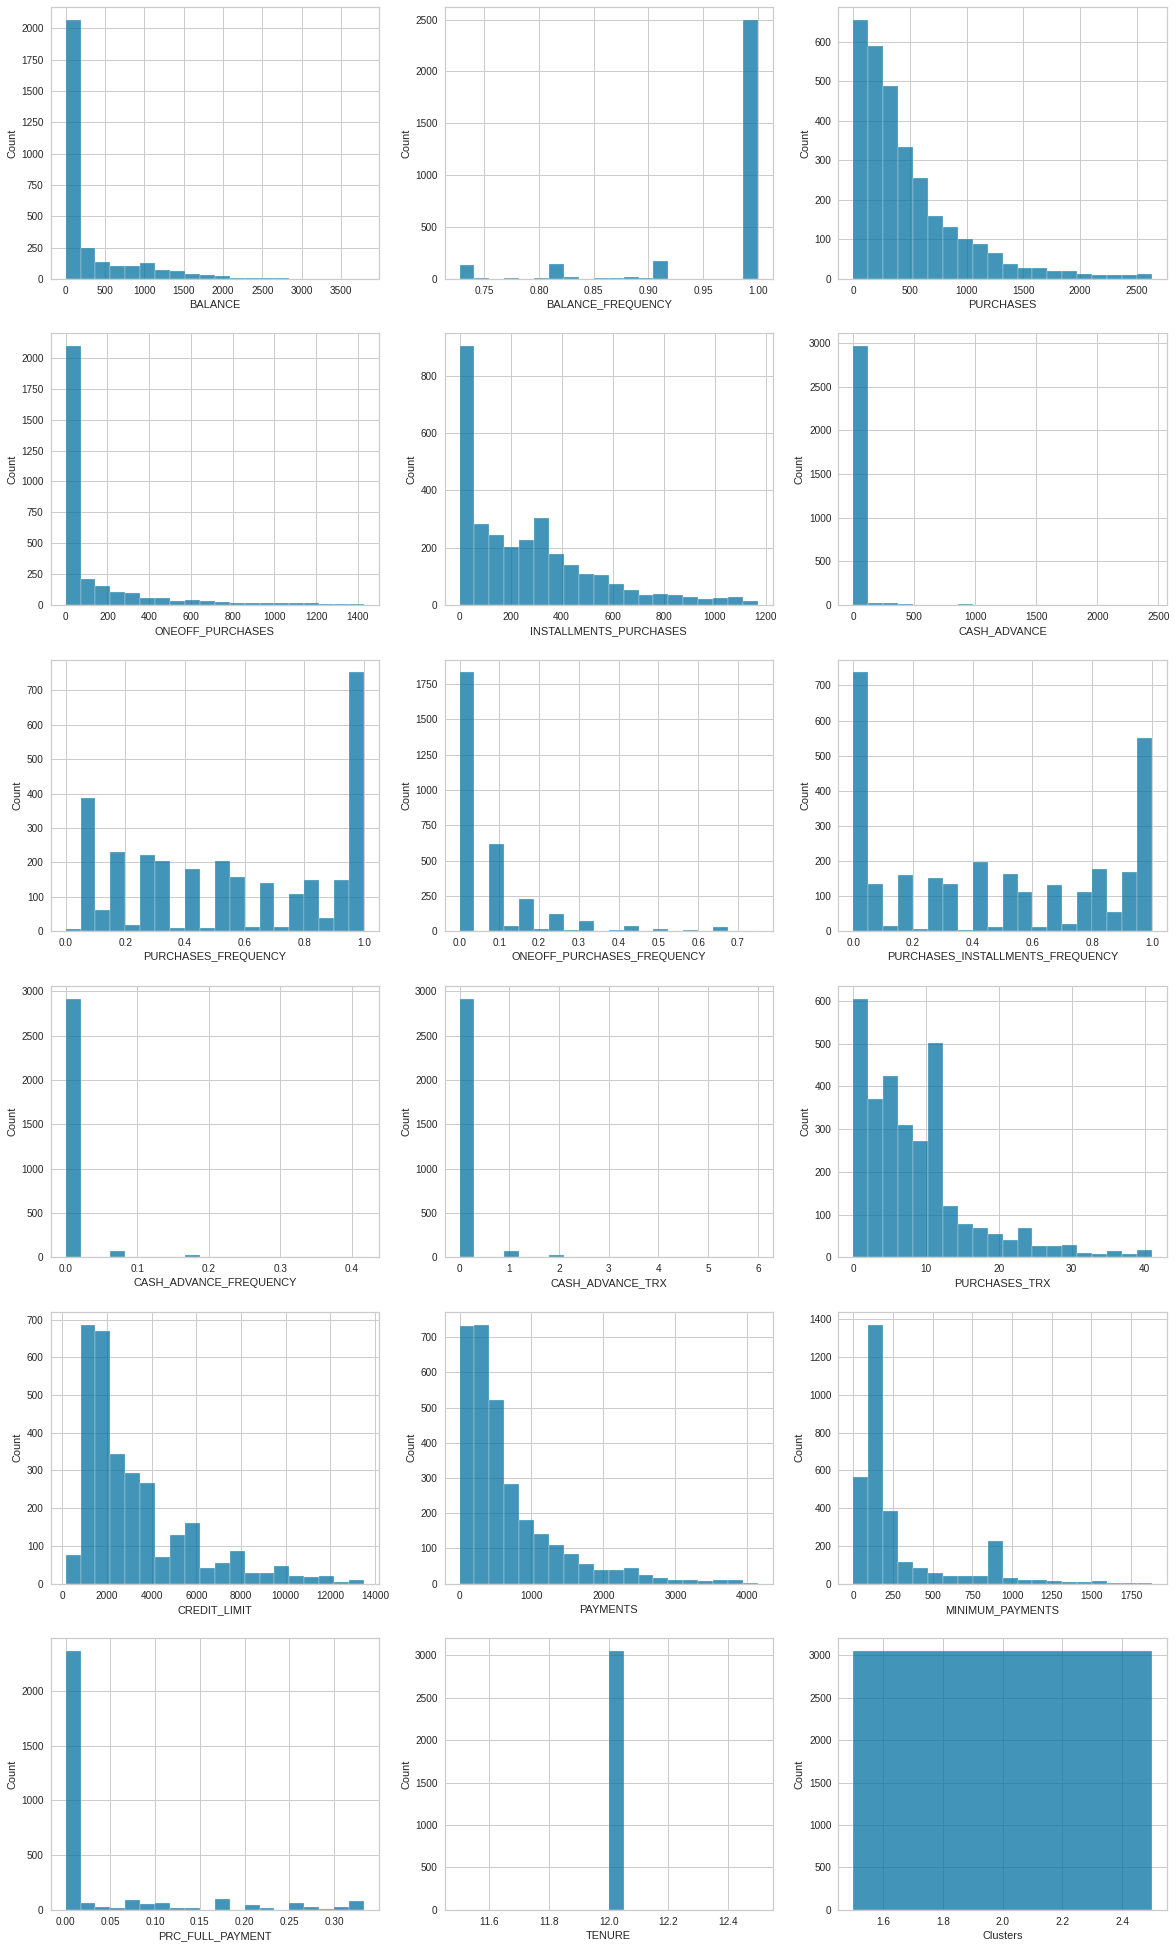

In [67]:
plt.figure(figsize=(20,35))

for i, col in enumerate(df.columns):

        ax = plt.subplot(6, 3, i+1)

        sns.histplot( x = col , ax=ax , bins=20 , data = df[df['Clusters'] == 2])

        plt.xlabel(col)
        
plt.show()


**Cluster 2 :**

Customers with Lower balance But Update their Balance Frequently.

May Make Installment Purchases and doesn't Prefer Paying in Advance.

Purchase Frequently with Low Payments and they have a Low Credit Limit.
